In [2]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
raw_data = loadarff('data/cleaned/pc4.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22.0,15.0,9.0,4.0,11.0,26.0,8.0,0.22,12.0,2.17,...,29.0,0.11,42.0,78.0,23.0,16.0,71.0,31.91,36.0,b'Y'
1,7.0,1.0,2.0,0.0,2.0,0.0,1.0,0.14,0.0,0.00,...,4.0,0.06,8.0,30.0,4.0,10.0,18.0,22.22,7.0,b'N'
2,10.0,3.0,2.0,0.0,2.0,4.0,2.0,0.20,2.0,2.00,...,9.0,0.08,12.0,25.0,8.0,12.0,24.0,16.67,10.0,b'N'
3,9.0,3.0,2.0,0.0,6.0,4.0,2.0,0.20,2.0,2.00,...,9.0,0.07,12.0,26.0,8.0,12.0,27.0,37.50,10.0,b'N'
4,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.00,...,2.0,0.10,4.0,8.0,3.0,7.0,10.0,0.00,4.0,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.29,2.0,2.00,...,7.0,0.22,17.0,23.0,5.0,7.0,9.0,0.00,7.0,b'N'
1375,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.33,2.0,2.00,...,7.0,0.25,13.0,17.0,5.0,7.0,8.0,0.00,6.0,b'N'
1376,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.07,0.0,0.00,...,3.0,0.06,29.0,76.0,3.0,8.0,17.0,0.00,15.0,b'N'
1377,1.0,3.0,1.0,0.0,0.0,4.0,2.0,0.40,2.0,2.00,...,7.0,0.25,10.0,14.0,6.0,10.0,8.0,0.00,5.0,b'N'


In [3]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16962 entries, 0 to 16961
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        16962 non-null  float64
 1   BRANCH_COUNT                     16962 non-null  float64
 2   CALL_PAIRS                       16962 non-null  float64
 3   LOC_CODE_AND_COMMENT             16962 non-null  float64
 4   LOC_COMMENTS                     16962 non-null  float64
 5   CONDITION_COUNT                  16962 non-null  float64
 6   CYCLOMATIC_COMPLEXITY            16962 non-null  float64
 7   CYCLOMATIC_DENSITY               16962 non-null  float64
 8   DECISION_COUNT                   16962 non-null  float64
 9   DESIGN_COMPLEXITY                16962 non-null  float64
 10  DESIGN_DENSITY                   16962 non-null  float64
 11  EDGE_COUNT                       16962 non-null  float64
 12  ESSENTIAL_COMPLEXI

In [28]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,7.357505,7.856418,2.327049,2.226251,5.110950,7.253082,4.538071,0.287716,3.299492,1.060167,...,3.672951,15.161711,0.181639,40.004351,64.155185,13.627991,12.243655,37.718637,18.405279,21.488035
std,9.974887,10.452032,2.853651,5.443696,9.662146,13.027232,5.483896,0.201082,5.780661,1.129120,...,6.856052,18.957498,0.177228,72.352738,101.420652,20.847643,6.263223,45.795602,21.352172,25.394029
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.150000,0.000000,0.000000,...,0.000000,5.000000,0.080000,9.000000,16.000000,6.000000,8.000000,12.000000,0.000000,7.000000
50%,4.000000,5.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.240000,0.000000,0.000000,...,0.000000,10.000000,0.130000,20.000000,35.000000,9.000000,11.000000,21.000000,10.870000,12.000000
75%,10.000000,9.000000,3.000000,2.000000,6.000000,8.000000,5.000000,0.380000,4.000000,2.000000,...,4.000000,18.000000,0.220000,45.000000,76.000000,17.000000,16.000000,48.000000,31.860000,27.000000
max,90.000000,143.000000,24.000000,68.000000,78.000000,118.000000,73.000000,1.000000,50.000000,5.000000,...,84.000000,286.000000,1.000000,1403.000000,1687.000000,601.000000,38.000000,627.000000,93.020000,210.000000


In [4]:
# trasform to binary and extract target dont run twice
df_data['Defective'] = df_data['Defective'].apply(lambda x: 1 if x == b'Y' else 0)
df_data.groupby("Defective").size()

Defective
0    1201
1     178
dtype: int64

In [6]:
# metric correlations- (step 1)

In [30]:
df_data.corr('spearman')

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
LOC_BLANK,1.000000,0.446659,0.484044,0.632910,0.783813,0.580397,0.437998,-0.531617,0.581377,0.507937,...,0.545646,-0.623616,0.668146,0.653945,0.691034,0.559279,0.864307,0.681424,0.718829,0.283966
BRANCH_COUNT,0.446659,1.000000,0.498534,0.456527,0.366273,0.551829,0.983449,0.116546,0.543734,0.456910,...,0.930273,0.237205,0.730889,0.746969,0.669362,0.834457,0.663590,0.203056,0.759923,0.122289
CALL_PAIRS,0.484044,0.498534,1.000000,0.306893,0.398636,0.252806,0.479964,-0.222091,0.252653,0.179990,...,0.665841,-0.176256,0.522449,0.527018,0.659368,0.508474,0.578683,0.282789,0.551242,0.079203
LOC_CODE_AND_COMMENT,0.632910,0.456527,0.306893,1.000000,0.589712,0.539963,0.452087,-0.356187,0.537330,0.472538,...,0.472410,-0.340555,0.558427,0.550824,0.548854,0.516570,0.661262,0.698967,0.627276,0.470929
LOC_COMMENTS,0.783813,0.366273,0.398636,0.589712,1.000000,0.514581,0.353760,-0.470211,0.515448,0.438210,...,0.458160,-0.587782,0.579182,0.553333,0.602436,0.477308,0.777492,0.853190,0.617239,0.246538
CONDITION_COUNT,0.580397,0.551829,0.252806,0.539963,0.514581,1.000000,0.527174,-0.218614,0.997410,0.937218,...,0.518935,-0.208325,0.512651,0.498809,0.480377,0.532257,0.571185,0.415041,0.565513,0.315677
CYCLOMATIC_COMPLEXITY,0.437998,0.983449,0.479964,0.452087,0.353760,0.527174,1.000000,0.133310,0.518762,0.441725,...,0.908756,0.255315,0.715701,0.731742,0.658325,0.826138,0.651064,0.196079,0.748215,0.124470
CYCLOMATIC_DENSITY,-0.531617,0.116546,-0.222091,-0.356187,-0.470211,-0.218614,0.133310,1.000000,-0.230026,-0.190758,...,-0.058672,0.881241,-0.458324,-0.426234,-0.470880,-0.184824,-0.527849,-0.430151,-0.499956,-0.282656
DECISION_COUNT,0.581377,0.543734,0.252653,0.537330,0.515448,0.997410,0.518762,-0.230026,1.000000,0.920846,...,0.517627,-0.219075,0.513054,0.497662,0.479930,0.525075,0.571567,0.414198,0.565563,0.317757
DECISION_DENSITY,0.507937,0.456910,0.179990,0.472538,0.438210,0.937218,0.441725,-0.190758,0.920846,1.000000,...,0.406520,-0.187120,0.418307,0.402181,0.401746,0.470410,0.480002,0.371962,0.471090,0.283696


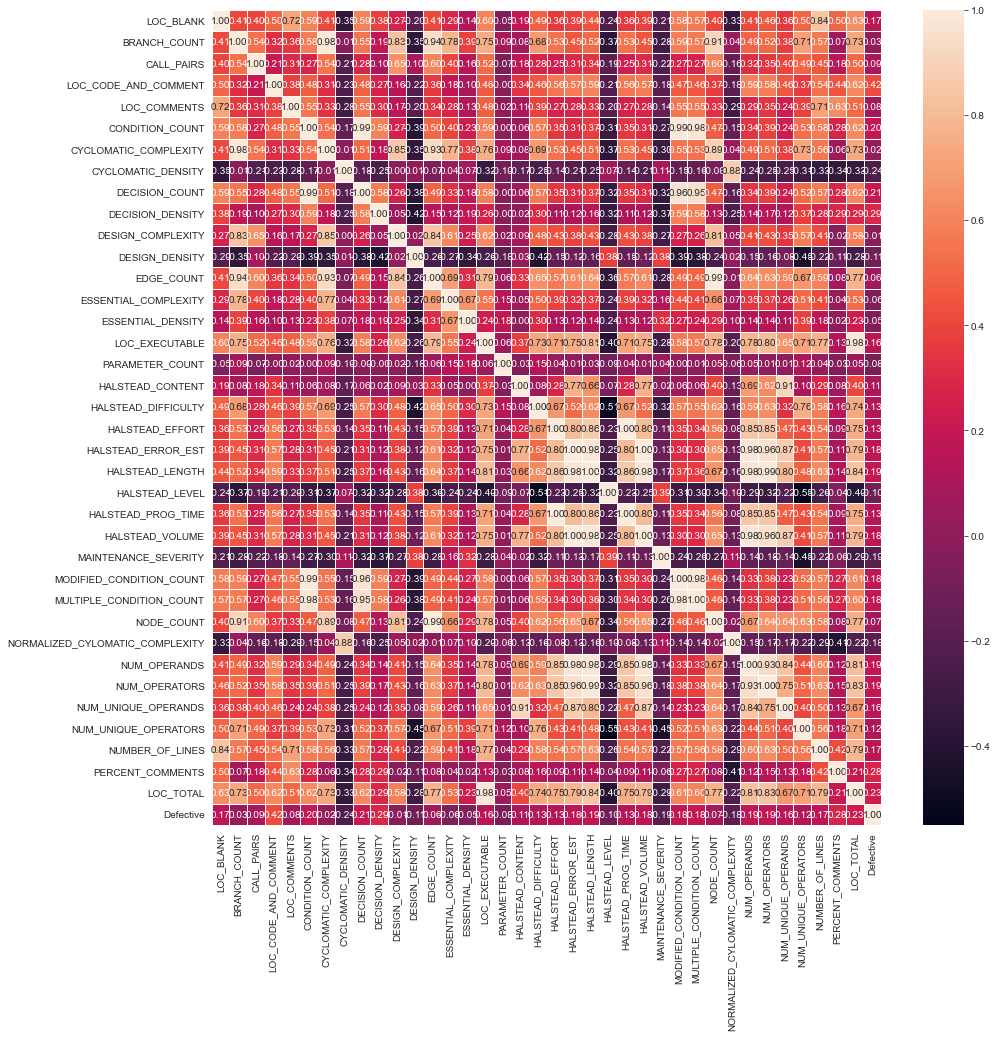

In [31]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [5]:
cor_matrix = df_data.corr('spearman').abs()

In [6]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                 LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  \
LOC_BLANK                              NaN      0.446659    0.484044   
BRANCH_COUNT                           NaN           NaN    0.498534   
CALL_PAIRS                             NaN           NaN         NaN   
LOC_CODE_AND_COMMENT                   NaN           NaN         NaN   
LOC_COMMENTS                           NaN           NaN         NaN   
CONDITION_COUNT                        NaN           NaN         NaN   
CYCLOMATIC_COMPLEXITY                  NaN           NaN         NaN   
CYCLOMATIC_DENSITY                     NaN           NaN         NaN   
DECISION_COUNT                         NaN           NaN         NaN   
DECISION_DENSITY                       NaN           NaN         NaN   
DESIGN_COMPLEXITY                      NaN           NaN         NaN   
DESIGN_DENSITY                         NaN           NaN         NaN   
EDGE_COUNT                             NaN           NaN        

In [7]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['LOC_COMMENTS', 'CYCLOMATIC_COMPLEXITY', 'DECISION_COUNT', 'DECISION_DENSITY', 'DESIGN_COMPLEXITY', 'EDGE_COUNT', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'PERCENT_COMMENTS', 'LOC_TOTAL']


In [8]:
df_data = df_data.drop(df_data[to_drop], axis=1)

In [9]:
df_data.shape

(1379, 11)

In [37]:
# Variance inflation factor analysis  (VIF) - setp 2

In [10]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [11]:
X = df_data.iloc[:, 0:-1]
y = df_data["Defective"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1379, 10)
y: (1379,)


In [12]:
vif(X)

,Feature,VIFscore
2,BRANCH_COUNT,5.446906
8,ESSENTIAL_COMPLEXITY,4.662521
10,MAINTENANCE_SEVERITY,2.261516
5,CONDITION_COUNT,2.203412
1,LOC_BLANK,1.983031
3,CALL_PAIRS,1.971787
7,DESIGN_DENSITY,1.791381
4,LOC_CODE_AND_COMMENT,1.454793
6,CYCLOMATIC_DENSITY,1.257885
9,PARAMETER_COUNT,1.103905


In [13]:
#Drop Branch_Count

In [14]:
X= X.drop(labels='BRANCH_COUNT',axis='columns')

In [15]:
X.columns

Index(['LOC_BLANK', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'CONDITION_COUNT',
       'CYCLOMATIC_DENSITY', 'DESIGN_DENSITY', 'ESSENTIAL_COMPLEXITY',
       'PARAMETER_COUNT', 'MAINTENANCE_SEVERITY'],
      dtype='object')

In [ ]:
#resampling

Classes: [0, 1]
Counts: [1201, 178]


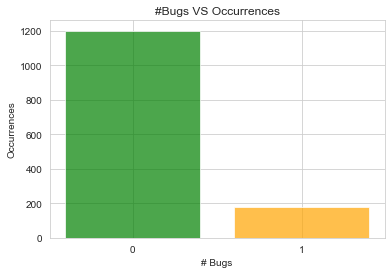

In [16]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
#oversampling using SMOTE up to 30%

In [17]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
#X_cv_over_sampled, y_cv_over_sampled = SMOTE().fit_resample(X_cv, y_cv)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (1561, 9) (1561,)


Classes: [0, 1]
Counts: [1201, 360]


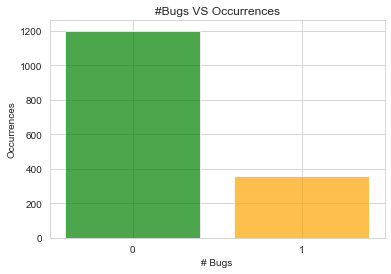

In [18]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

Defective
0    1201
1     360
Name: Defective, dtype: int64

In [20]:
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [21]:
data

,LOC_BLANK,CALL_PAIRS,LOC_CODE_AND_COMMENT,CONDITION_COUNT,CYCLOMATIC_DENSITY,DESIGN_DENSITY,ESSENTIAL_COMPLEXITY,PARAMETER_COUNT,MAINTENANCE_SEVERITY,Defective
0,22.000000,9.000000,4.000000,26.000000,0.220000,0.630000,1.000000,0.0,0.130000,1
1,7.000000,2.000000,0.000000,0.000000,0.140000,1.000000,1.000000,0.0,1.000000,0
2,10.000000,2.000000,0.000000,4.000000,0.200000,1.000000,1.000000,0.0,0.500000,0
3,9.000000,2.000000,0.000000,4.000000,0.200000,1.000000,1.000000,0.0,0.500000,0
4,3.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,0.0,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
1556,19.401639,1.398908,9.797815,14.398908,0.121967,0.293743,3.398908,1.0,0.645874,1
1557,4.000000,0.341510,1.341510,12.000000,0.199755,0.292689,1.000000,0.0,0.250000,1
1558,12.516430,0.494523,3.000000,8.989047,0.109233,0.414069,1.989047,0.0,0.537700,1
1559,19.000000,4.748067,7.763533,73.228733,0.193702,0.146608,1.251933,1.0,0.068895,1


In [45]:
# save the dataset for c5
filename = 'pc4.csv'
data.to_csv('data/cleaned/expr1/{}'.format(filename),sep=',')

In [ ]:
# Model Construction

In [23]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)

Train: (1092, 9) (1092,) Test: (235, 9) (235,) Cross Validation (234, 9) (234,)


In [24]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [25]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [26]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [27]:
scores = {}

In [78]:
# classifiers after removing multi-columuiray

In [79]:
#adaboost

In [28]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 1.0, 'n_estimators': 200}


accuracy: 87.65957446808511 %
recall: 82.67157370930956 %
ROC: 82.67157370930956 %


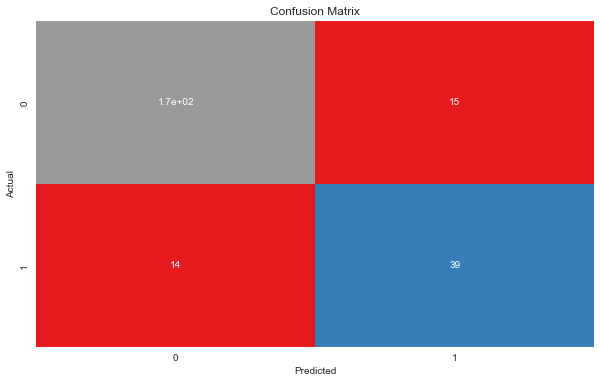

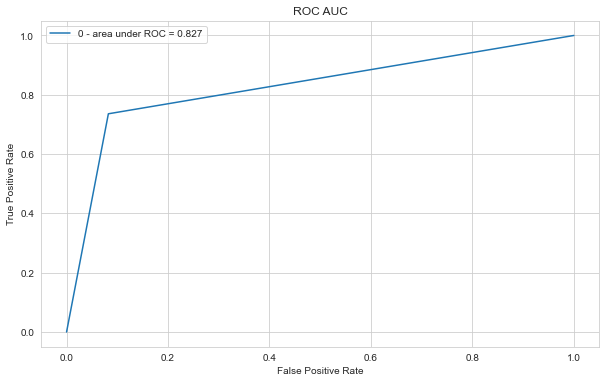

In [29]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

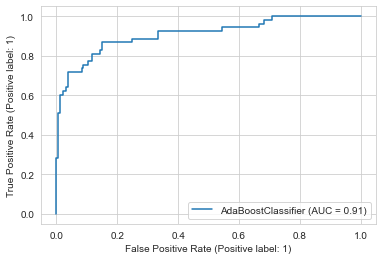

In [30]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [31]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[12:03:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:03:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 90.2127659574468 %
recall: 86.32593821273066 %
ROC: 86.32593821273066 %


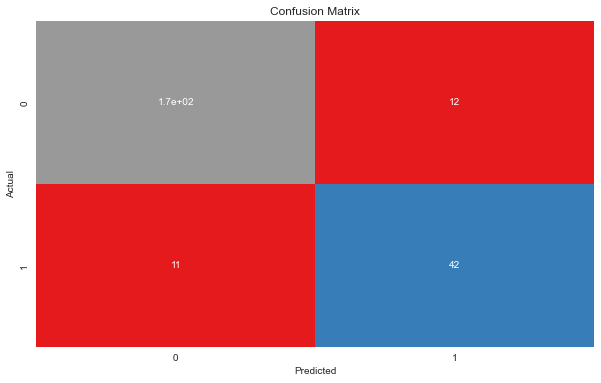

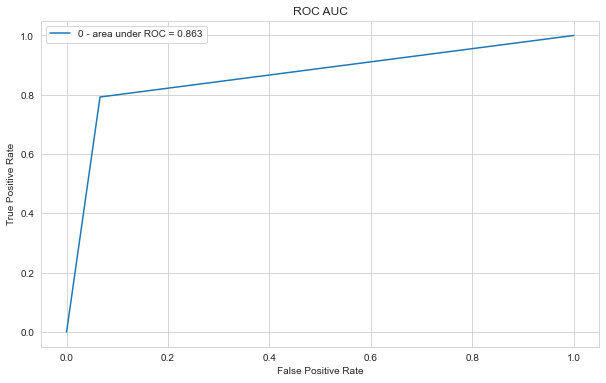

In [32]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

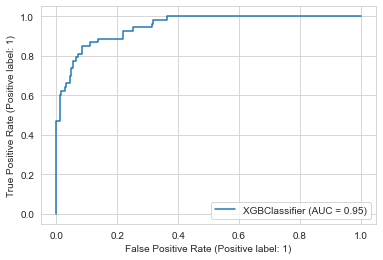

In [33]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [34]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'gini', 'max_depth': 20, 'max_features': 1.0, 'n_estimators': 200}


accuracy: 87.65957446808511 %
recall: 82.00290275761975 %
ROC: 82.00290275761974 %


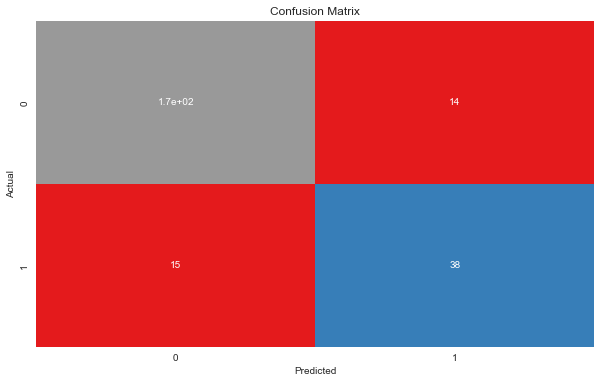

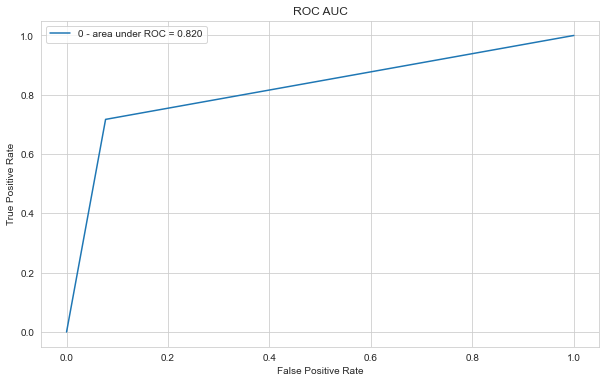

In [35]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

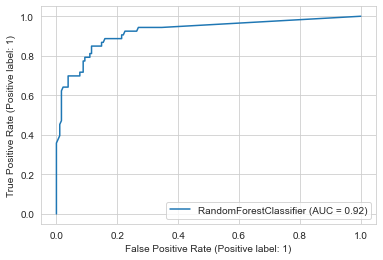

In [36]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [37]:
# SVC()
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


accuracy: 82.97872340425532 %
recall: 66.94484760522496 %
ROC: 66.94484760522496 %


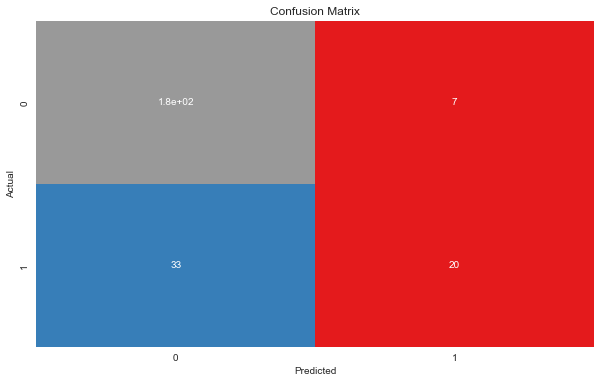

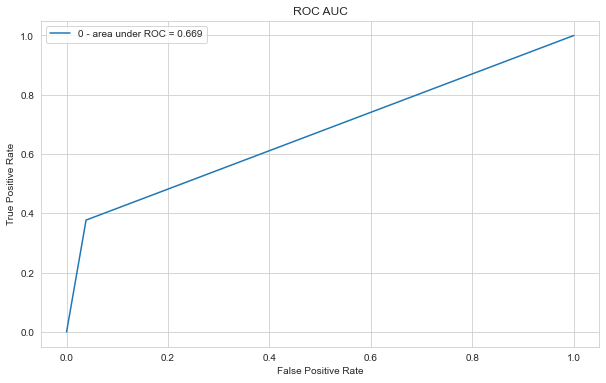

In [38]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}                 

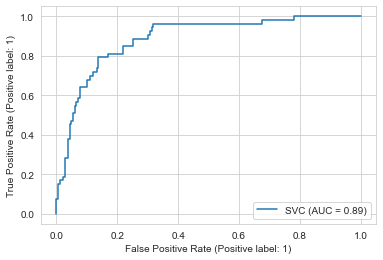

In [39]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [40]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 77.4468085106383 %
recall: 70.06012855069459 %
ROC: 70.06012855069459 %


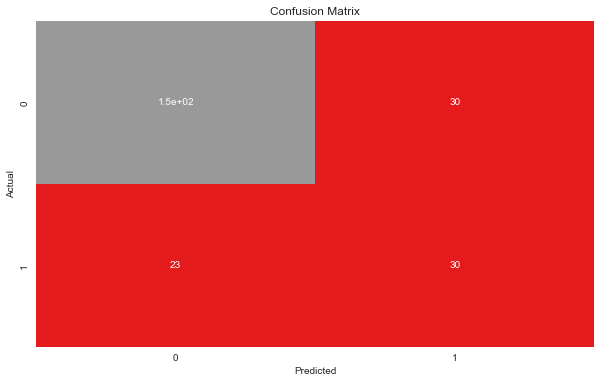

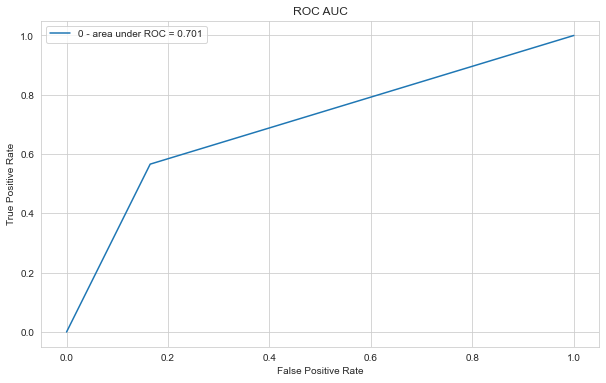

In [41]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

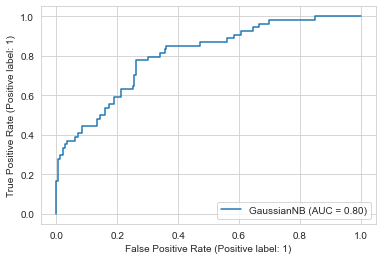

In [42]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [43]:
# Model Evaluation Comparision '%'

In [43]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [44]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
XGBoost | Binary,90.21,86.33,86.08,86.33,94.93
Random Forest | Binary,87.66,82.00,82.22,82.00,92.21
AdaBoost Classifier | Binary,87.66,82.67,82.45,82.67,90.96
Support-Vector Machine | Binary,82.98,66.94,69.87,66.94,88.69
Naive Bayes | Binary,77.45,70.06,69.13,70.06,80.27
